In [1]:
from os import getcwd,listdir
from functools import reduce
import pandas as pd
from timeit import default_timer as timer
import numpy as np
import matplotlib.pyplot as plt

In [2]:
babies_path = getcwd()+"\\resources\\babies"
files = listdir(babies_path)

In [3]:
txts = [x for x in files if x.lower().endswith('.txt')]

In [4]:
#for x in txts: open(babies_path+'\\'+'ALL.TXT','a').write(open(babies_path+'\\'+x,'r').read())

In [5]:
data = pd.read_csv(open(babies_path+'\\'+'ALL.TXT'),names=["State","Gender","Year","Name","Occurences"])

In [6]:
data

,State,Gender,Year,Name,Occurences
0,AK,F,1910,Mary,14
1,AK,F,1910,Annie,12
2,AK,F,1910,Anna,10
3,AK,F,1910,Margaret,8
4,AK,F,1910,Helen,7
...,...,...,...,...,...
6122885,WY,M,2019,Theo,5
6122886,WY,M,2019,Tristan,5
6122887,WY,M,2019,Vincent,5
6122888,WY,M,2019,Warren,5


In [7]:
data["1stLetter"] = pd.Series([x[0] for x in data["Name"]])

In [8]:
data

,State,Gender,Year,Name,Occurences,1stLetter
0,AK,F,1910,Mary,14,M
1,AK,F,1910,Annie,12,A
2,AK,F,1910,Anna,10,A
3,AK,F,1910,Margaret,8,M
4,AK,F,1910,Helen,7,H
...,...,...,...,...,...,...
6122885,WY,M,2019,Theo,5,T
6122886,WY,M,2019,Tristan,5,T
6122887,WY,M,2019,Vincent,5,V
6122888,WY,M,2019,Warren,5,W


In [9]:
def add_prop(group):
    occur = group.Occurences.astype(float)
    group['Prop'] = occur / occur.sum()
    return group
data_prop = data.groupby(["Year","Gender"]).apply(add_prop)
data_prop

,State,Gender,Year,Name,Occurences,1stLetter,Prop
0,AK,F,1910,Mary,14,M,0.000040
1,AK,F,1910,Annie,12,A,0.000034
2,AK,F,1910,Anna,10,A,0.000028
3,AK,F,1910,Margaret,8,M,0.000023
4,AK,F,1910,Helen,7,H,0.000020
...,...,...,...,...,...,...,...
6122885,WY,M,2019,Theo,5,T,0.000003
6122886,WY,M,2019,Tristan,5,T,0.000003
6122887,WY,M,2019,Vincent,5,V,0.000003
6122888,WY,M,2019,Warren,5,W,0.000003


In [10]:
data[["1stLetter","Occurences"]].groupby(["1stLetter"]).sum().sort_values(by="Occurences",ascending=False)

,Occurences
1stLetter,
J,41880171
M,29513491
A,25934944
C,23113783
D,22095601
R,21835265
S,19350016
L,16596969
B,15245014


<AxesSubplot:xlabel='1stLetter'>

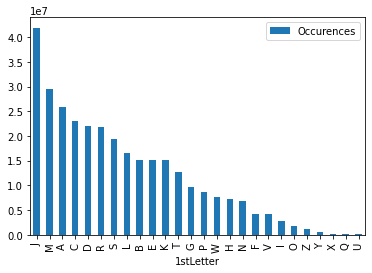

In [11]:
data[["1stLetter","Occurences"]].groupby(["1stLetter"]).sum().sort_values(by="Occurences",ascending=False).plot(kind="bar")

In [12]:
letters = data["1stLetter"].unique()
years = data["Year"].unique()
letters_years = data[["1stLetter","Year","Occurences"]]
letters_years

,1stLetter,Year,Occurences
0,M,1910,14
1,A,1910,12
2,A,1910,10
3,M,1910,8
4,H,1910,7
...,...,...,...
6122885,T,2019,5
6122886,T,2019,5
6122887,V,2019,5
6122888,W,2019,5


In [13]:
#Versión Lenta
start=timer()
list_letters_years_sum = [pd.DataFrame(letters_years[letters_years["Year"]==x].groupby(["1stLetter"]).sum()["Occurences"],index=letters).fillna(0).astype(int).rename(columns={"Occurences":x}) for x in years]
table_years_letters = pd.DataFrame(index=letters)
for x in list_letters_years_sum:
    table_years_letters.insert(value=x,column=x.columns[0],loc=len(table_years_letters.columns))
table_years_letters.fillna(0).astype(int)
end=timer()
end-start

1.2047696000000006

In [14]:
#Versión rápida
start=timer()
table_years_letters = letters_years.pivot_table('Occurences',index='1stLetter',columns='Year',aggfunc=sum).fillna(0).astype(int)
end=timer()
end-start

0.3419053000000005

In [15]:
sum_occur_year = data[["Year","Occurences"]].groupby("Year").sum()

In [16]:
table_proportionality_years_letters = table_years_letters.apply(lambda x: x/sum(x)*100)
table_proportionality_years_letters

Year,1910,1911,1912,1913,1914,1915,1916,1917,1918,1919,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
1stLetter,,,,,,,,,,,,,,,,,,,,,
A,7.700949,7.672092,7.534442,7.443480,7.378293,7.317311,7.199152,7.127784,6.927329,6.782244,...,14.049680,14.126626,14.184816,14.062587,14.176528,14.263351,14.175749,13.943471,13.680427,13.582364
B,3.479479,3.337121,3.080398,3.026508,2.973523,2.988273,3.039603,3.117506,3.216015,3.335235,...,4.777511,4.942777,4.919416,4.743472,4.575408,4.445709,4.329965,4.265209,4.132198,4.046688
C,5.402343,5.410407,5.763726,5.686394,5.757074,5.738086,5.756735,5.646819,5.664595,5.579169,...,7.532331,7.459611,7.384606,7.359512,7.320245,7.243816,7.160855,6.966999,6.897825,6.860672
D,3.181985,3.478333,3.547402,3.608185,3.727767,3.921584,4.043960,4.149095,4.292093,4.443978,...,4.426436,4.184884,4.093275,3.995196,3.938022,3.872322,3.724888,3.727384,3.705452,3.563213
E,10.286590,10.166715,9.633086,9.595189,9.392290,9.378132,9.350602,9.183524,9.080628,9.091760,...,6.367868,6.568377,6.804459,6.924583,7.144497,7.281404,7.562626,7.885999,8.101395,8.305842
F,4.146903,4.175555,4.165869,4.187237,4.197555,4.173180,4.089580,4.068962,4.041662,3.893034,...,0.775048,0.778469,0.792019,0.832124,0.897141,0.934777,1.008623,1.028286,1.004659,1.024389
G,4.276088,4.263569,4.237941,4.207945,4.186808,4.145311,4.139677,4.132605,4.111100,4.120062,...,3.203392,3.229361,3.247316,3.197852,3.185242,3.164284,3.153792,3.055111,3.032017,2.946429
H,5.671560,5.872747,6.045482,6.062058,5.957484,6.025541,5.940949,5.890826,5.815440,5.691251,...,2.285653,2.425391,2.629283,2.742431,2.851317,2.971655,3.025967,3.064617,3.108753,3.129638
I,1.932161,1.877639,1.705627,1.674156,1.632507,1.635142,1.618122,1.582006,1.539191,1.553694,...,2.431707,2.380868,2.396134,2.344003,2.308443,2.272072,2.273154,2.319253,2.328199,2.309691


<AxesSubplot:xlabel='Year'>

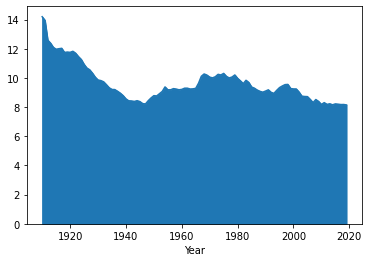

In [17]:
table_proportionality_years_letters.loc["M"].plot(kind="area")

<AxesSubplot:xlabel='Year'>

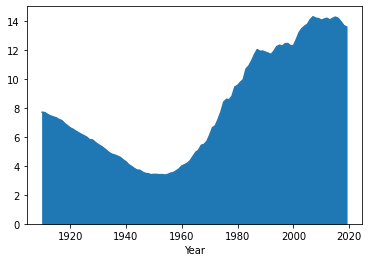

In [18]:
table_proportionality_years_letters.loc["A"].plot(kind="area")

<AxesSubplot:xlabel='Year'>

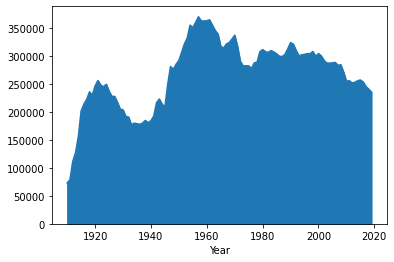

In [19]:
table_years_letters.loc["M"].plot(kind="area")

<AxesSubplot:xlabel='Year'>

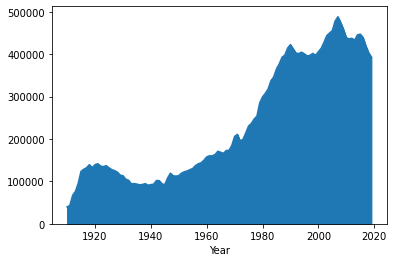

In [20]:
table_years_letters.loc["A"].plot(kind="area")

In [21]:
occur_gender_year = data[["Gender","Occurences","Year"]]

In [22]:
occur_gender_year

,Gender,Occurences,Year
0,F,14,1910
1,F,12,1910
2,F,10,1910
3,F,8,1910
4,F,7,1910
...,...,...,...
6122885,M,5,2019
6122886,M,5,2019
6122887,M,5,2019
6122888,M,5,2019


In [23]:
pivot_ogy = occur_gender_year.pivot_table('Occurences', index='Year', columns='Gender', aggfunc=sum)

In [24]:
pivot_ogy

Gender,F,M
Year,,
1910,352089,164224
1911,372376,193441
1912,504298,383704
1913,566973,461605
1914,696907,596441
...,...,...
2015,1457416,1676595
2016,1445267,1653511
2017,1403989,1604609


<AxesSubplot:title={'center':'Occurences by year and gender'}, xlabel='Year'>

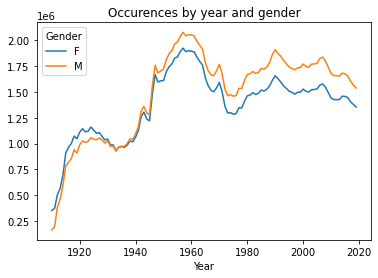

In [25]:
pivot_ogy.plot(title='Occurences by year and gender')

In [26]:
occur_state_year = data[["Occurences","State","Year"]]

In [27]:
pivot_osy = occur_state_year.pivot_table("Occurences",index="Year",columns="State",aggfunc=sum)

In [28]:
occur_name_year_gender = data_prop[["Occurences","Year","Name","Gender","Prop"]]
occur_name_year_gender

,Occurences,Year,Name,Gender,Prop
0,14,1910,Mary,F,0.000040
1,12,1910,Annie,F,0.000034
2,10,1910,Anna,F,0.000028
3,8,1910,Margaret,F,0.000023
4,7,1910,Helen,F,0.000020
...,...,...,...,...,...
6122885,5,2019,Theo,M,0.000003
6122886,5,2019,Tristan,M,0.000003
6122887,5,2019,Vincent,M,0.000003
6122888,5,2019,Warren,M,0.000003


In [29]:
top_1000_names_by_gender_year = occur_name_year_gender.groupby(["Year","Name","Gender"]).sum().sort_values(by="Occurences",ascending=False)[:1000].reset_index(inplace=False)

In [30]:
top_1000_names_by_gender_year

,Year,Name,Gender,Occurences,Prop
0,1947,Linda,F,99690,0.059721
1,1948,Linda,F,96213,0.060269
2,1947,James,M,94766,0.053889
3,1957,Michael,M,92726,0.044610
4,1947,Robert,M,91645,0.052114
...,...,...,...,...,...
995,1989,Joseph,M,29876,0.016044
996,1953,Karen,F,29857,0.016866
997,1989,John,M,29852,0.016031
998,1956,Donna,F,29852,0.015804


In [31]:
males_from_top_1000 = top_1000_names_by_gender_year[top_1000_names_by_gender_year.Gender == 'M']

In [32]:
males_from_top_1000

,Year,Name,Gender,Occurences,Prop
2,1947,James,M,94766,0.053889
3,1957,Michael,M,92726,0.044610
4,1947,Robert,M,91645,0.052114
6,1956,Michael,M,90662,0.044487
7,1958,Michael,M,90531,0.044296
...,...,...,...,...,...
993,1945,Michael,M,29901,0.023315
994,1980,Daniel,M,29892,0.017914
995,1989,Joseph,M,29876,0.016044
997,1989,John,M,29852,0.016031


In [33]:
females_from_top_1000 = top_1000_names_by_gender_year[~top_1000_names_by_gender_year.isin(males_from_top_1000).Occurences]

In [34]:
females_from_top_1000.fillna(0)

,Year,Name,Gender,Occurences,Prop
0,1947,Linda,F,99690,0.059721
1,1948,Linda,F,96213,0.060269
5,1949,Linda,F,91019,0.056581
60,1950,Linda,F,80433,0.049957
90,1921,Mary,F,73985,0.064611
...,...,...,...,...,...
969,1964,Karen,F,30247,0.017183
975,1959,Cynthia,F,30171,0.015880
984,1955,Nancy,F,30017,0.016319
996,1953,Karen,F,29857,0.016866


In [35]:
pivot_year_name = data.pivot_table('Occurences',index='Year',columns='Name',aggfunc=sum)

array([<AxesSubplot:xlabel='Year'>, <AxesSubplot:xlabel='Year'>],
      dtype=object)

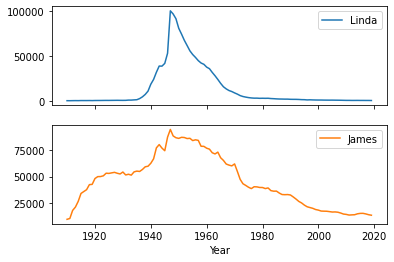

In [36]:
pivot_year_name[["Linda","James"]].plot(subplots=True,grid=False)

In [37]:
pivot_prop_year_gender = top_1000_names_by_gender_year.pivot_table('Prop',index='Year',columns='Gender',aggfunc=sum)
pivot_prop_year_gender.fillna(0)

Gender,F,M
Year,,
1912,0.064057,0.000000
1913,0.064627,0.000000
1914,0.065066,0.063624
1915,0.098017,0.153448
1916,0.097413,0.192282
...,...,...
1998,0.000000,0.059859
1999,0.000000,0.057400
2000,0.000000,0.037568


<AxesSubplot:xlabel='Year'>

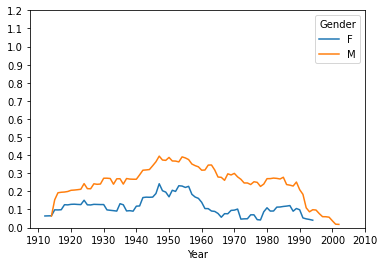

In [38]:
pivot_prop_year_gender.plot(yticks=np.linspace(0,1.2,13),xticks=range(1910,2020,10))

In [39]:
boys = males_from_top_1000[males_from_top_1000.Year == 1947]
boys

,Year,Name,Gender,Occurences,Prop
2,1947,James,M,94766,0.053889
4,1947,Robert,M,91645,0.052114
11,1947,John,M,88320,0.050223
134,1947,William,M,66989,0.038093
230,1947,Richard,M,58522,0.033278
241,1947,David,M,57810,0.032874
362,1947,Michael,M,50503,0.028718
463,1947,Thomas,M,44837,0.025497
530,1947,Charles,M,40774,0.023186
724,1947,Larry,M,34939,0.019868


In [40]:
prop_cumsum = boys.sort_index(ascending=False).Prop.cumsum()
prop_cumsum

983    0.017076
727    0.036918
724    0.056786
530    0.079972
463    0.105468
362    0.134187
241    0.167061
230    0.200339
134    0.238432
11     0.288655
4      0.340769
2      0.394658
Name: Prop, dtype: float64

In [41]:
prop_cumsum.searchsorted(0.5)

12

In [42]:
def get_quantile_count(group, q=0.5):
    group = group.sort_index(ascending=False)
    return group.Prop.cumsum().searchsorted(q) + 1

In [43]:
diversity = top_1000_names_by_gender_year.groupby(['Year','Gender']).apply(get_quantile_count)
diversity

Year  Gender
1912  F         2
1913  F         2
1914  F         2
      M         2
1915  F         3
               ..
1998  M         4
1999  M         4
2000  M         3
2001  M         2
2002  M         2
Length: 172, dtype: int64

In [44]:
diversity = diversity.unstack('Gender')
diversity

Gender,F,M
Year,,
1912,2.0,NaN
1913,2.0,NaN
1914,2.0,2.0
1915,3.0,4.0
1916,3.0,5.0
...,...,...
1998,NaN,4.0
1999,NaN,4.0
2000,NaN,3.0


<AxesSubplot:xlabel='Year'>

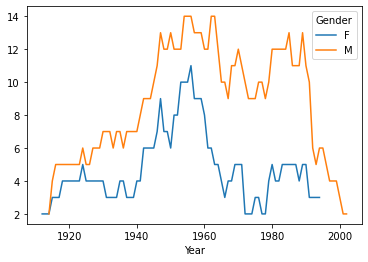

In [45]:
diversity.plot()

In [46]:
pivot_letter_gender_year = data.pivot_table('Occurences',index='1stLetter',columns=['Gender','Year'],aggfunc=sum)

In [47]:
pivot_letter_gender_year = pivot_letter_gender_year.fillna(0).astype(int)
pivot_letter_gender_year

Gender         F                                                        \
Year        1910   1911   1912    1913    1914    1915    1916    1917   
1stLetter                                                                
A          29624  30915  41691   46491   56674   73503   76656   78739   
B          15345  15697  21077   23229   27955   36340   39293   42300   
C          14945  15696  21186   23141   28971   36991   39639   40414   
D          12563  14753  20734   23916   30794   41697   45604   48288   
E          42252  44716  59793   67373   81059  105143  110752  112648   
F          13321  13942  18541   20778   25899   33482   35304   36390   
G          14699  15072  20158   22006   26708   34345   36459   37452   
H          18028  19717  26600   30156   37040   48840   51335   53187   
I           9001   9390  12553   14276   17093   22436   23584   23796   
J          13984  14872  20902   25200   31865   42698   47494   50947   
K           4546   4804   6726    7492    9786   12332   13099   13534   
L          29045  29781  39838   43674   53379   69184   72634   74018   
M          68125  72094  97162  109252  132758  171408  181722  189063   
N           6540   6696   8909    9849   12167   16023   16829   17518   
O           4366   4500   6094    6545    7871   10219   10913   10891   
P           5833   6062   8274    9340   11874   15778   17145   18344   
Q             92     92    124     126     168     158     196     223   
R          19555  21247  29359   33097   41692   55357   58753   60324   
S          10161  10568  14337   16392   20657   25830   27286   27937   
T           4607   4762   6559    7303    9020   11657   12568   12830   
U             54     48    110     127     173     190     222     201   
V          11233  12443  17156   19979   24440   32826   35424   37761   
W           3513   3800   5379    5986    7386    9871   10718   11296   
X              0      0      0       0       0       0       0       0   
Y            200    195    360     445     604     928    1021    1140   
Z            457    514    676     800     874    1307    1340    1191   

Gender                     ...       M                                  \
Year         1918    1919  ...    2010    2011    2012    2013    2014   
1stLetter                  ...                                           
A           81874   78056  ...  178614  176498  172752  167316  170284   
B           47131   47838  ...   96846   99746   99270   96011   94500   
C           42956   41534  ...  155495  150774  147301  144840  144659   
D           53697   54047  ...  104859   98425   97581   95079   94080   
E          118902  115710  ...   94570   93970   96073   95897   98468   
F           39375   36991  ...   12909   12617   12763   13845   14925   
G           39833   39094  ...   56217   56038   58002   57463   58978   
H           56006   52711  ...   30980   33213   35018   37481   40413   
I           25093   24645  ...   34170   35229   36120   34990   35008   
J           56809   56176  ...  276945  265530  258108  260290  254506   
K           14249   13674  ...   62607   61956   62989   64640   68843   
L           80458   78468  ...   93267   94720  100744  105012  112637   
M          200212  195241  ...  110747  116284  115872  115949  118406   
N           18693   18729  ...   57207   55657   55765   55886   56843   
O           11330   11163  ...   21012   21349   22420   23913   27049   
P           20166   19925  ...   26675   26118   26324   25832   26645   
Q             240     254  ...    3395    3076    2826    2779    2645   
R           64945   64009  ...   67830   68647   67502   66811   70110   
S           30286   29725  ...   59365   57353   57247   57986   60381   
T           13338   13183  ...   60603   56274   54088   51989   51051   
U             266     265  ...    2254    1992    1931    1892    1962   
V           42328   40851  ...    9357    9493    9386    9591    9648   
W  

In [48]:
subtable = pivot_letter_gender_year.reindex(columns=[1910,1960,2019], level='Year')

In [49]:
subtable

Gender         F                      M                
Year        1910    1960    2019   1910    1960    2019
1stLetter                                              
A          29624   80997  237818  10137   76646  154953
B          15345   96348   40617   2620   90539   76404
C          14945  180455   81109  12948  105187  117286
D          12563  200794   27309   3866  233491   75731
E          42252   53597  139459  10859   54139  100727
F          13321   11286   13439   8090   29600   16184
G          14699   35869   34571   7379   93066   50633
H          18028   13630   49405  11255   25095   41097
I           9001    6598   36789    975    3088   30002
J          13984  165707   58572  33296  314008  201706
K           4546  143150   68128   1037   93708   70782
L          29045  180518   96398   8908   58427  123229
M          68125  160784  120804   5167  202928  114780
N           6540   34210   44257   1473   14203   51371
O           4366    1760   24999   1659    3332   33126
P           5833   95349   33791   3872   65002   21221
Q             92      94    3619     10     259    2235
R          19555   87472   58910  14068  257162   67205
S          10161  177226   98024   4329  108979   58261
T           4607  104119   16729   4578  131494   46455
U             54     177     173     28     293    1697
V          11233   41503   31270   1266   12993    8852
W           3513   15570    9667  16392   78706   42924
X              0      13    3001      0      84    6892
Y            200    7182    4407      7     100    4994
Z            457     324   20451      5     396   19309

In [50]:
subtable.sum()

Gender  Year
F       1910     352089
        1960    1894732
        2019    1353716
M       1910     164224
        1960    2052925
        2019    1538056
dtype: int64

In [51]:
letter_prop = subtable / subtable.sum().astype(float)*100
letter_prop

Gender             F                                M                      
Year            1910       1960       2019       1910       1960       2019
1stLetter                                                                  
A           8.413782   4.274853  17.567791   6.172667   3.733502  10.074601
B           4.358273   5.085046   3.000408   1.595382   4.410244   4.967569
C           4.244665   9.524038   5.991582   7.884353   5.123762   7.625600
D           3.568132  10.597488   2.017336   2.354102  11.373577   4.923813
E          12.000375   2.828738  10.301939   6.612310   2.637164   6.548981
F           3.783418   0.595652   0.992749   4.926198   1.441845   1.052237
G           4.174797   1.893091   2.553785   4.493253   4.533337   3.292013
H           5.120296   0.719363   3.649584   6.853444   1.222402   2.672009
I           2.556456   0.348229   2.717631   0.593701   0.150420   1.950644
J           3.971723   8.745670   4.326757  20.274747  15.295639  13.114347
K           1.291151   7.555158   5.032666   0.631455   4.564609   4.602043
L           8.249335   9.527363   7.120991   5.424299   2.846037   8.011997
M          19.348801   8.485844   8.923881   3.146312   9.884823   7.462667
N           1.857485   1.805532   3.269297   0.896946   0.691842   3.339995
O           1.240027   0.092889   1.846695   1.010206   0.162305   2.153758
P           1.656683   5.032321   2.496166   2.357755   3.166311   1.379729
Q           0.026130   0.004961   0.267338   0.006089   0.012616   0.145313
R           5.553993   4.616590   4.351725   8.566348  12.526614   4.369477
S           2.885918   9.353618   7.241105   2.636034   5.308474   3.787964
T           1.308476   5.495183   1.235784   2.787656   6.405202   3.020371
U           0.015337   0.009342   0.012780   0.017050   0.014272   0.110334
V           3.190387   2.190442   2.309938   0.770898   0.632902   0.575532
W           0.997759   0.821752   0.714108   9.981489   3.833847   2.790796
X           0.000000   0.000686   0.221686   0.000000   0.004092   0.448098
Y           0.056804   0.379051   0.325548   0.004262   0.004871   0.324696
Z           0.129797   0.017100   1.510730   0.003045   0.019290   1.255416

<AxesSubplot:title={'center':'Female'}, xlabel='1stLetter'>

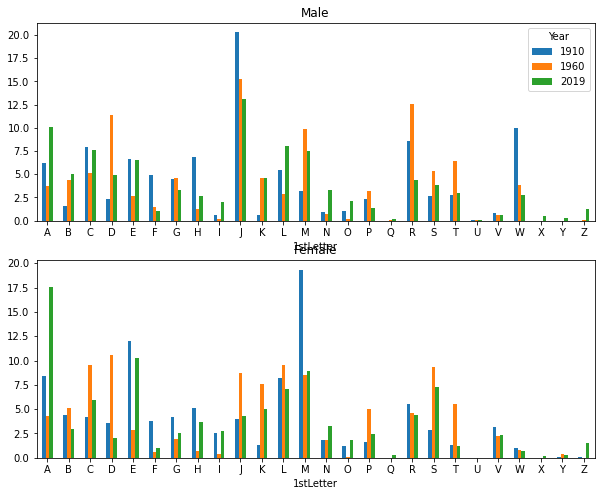

In [52]:
fig,axes = plt.subplots(2,1,figsize=(10,8))
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male')
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Female',legend=False)

In [53]:
letter_prop = pivot_letter_gender_year / pivot_letter_gender_year.sum().astype(float)
jrw_ts = letter_prop.loc[['J', 'R', 'W'],'M'].T
jrw_ts

1stLetter,J,R,W
Year,,,
1910,0.202747,0.085663,0.099815
1911,0.192343,0.086678,0.097322
1912,0.176965,0.088675,0.096606
1913,0.174173,0.090634,0.096671
1914,0.173196,0.092482,0.093637
...,...,...,...
2015,0.145012,0.041894,0.024203
2016,0.140852,0.042787,0.025315
2017,0.137089,0.043111,0.026721


<AxesSubplot:xlabel='Year'>

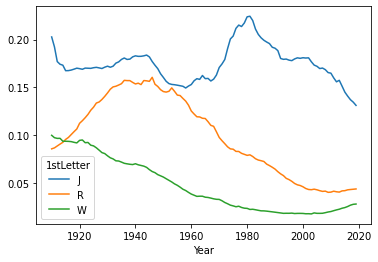

In [54]:
jrw_ts.plot()

In [55]:
top_1000_names = top_1000_names_by_gender_year.Name.unique()
top_1000_names

array(['Linda', 'James', 'Michael', 'Robert', 'John', 'David', 'Mary',
       'William', 'Jennifer', 'Lisa', 'Christopher', 'Richard', 'Mark',
       'Patricia', 'Jessica', 'Jason', 'Ashley', 'Deborah', 'Debra',
       'Matthew', 'Barbara', 'Thomas', 'Susan', 'Joshua', 'Shirley',
       'Amanda', 'Charles', 'Karen', 'Dorothy', 'Cynthia', 'Gary',
       'Daniel', 'Steven', 'Betty', 'Brittany', 'Donna', 'Brian',
       'Andrew', 'Helen', 'Jacob', 'Justin', 'Larry', 'Ronald', 'Sandra',
       'Michelle', 'Carol', 'Kimberly', 'Melissa', 'Jeffrey', 'Joseph',
       'Nancy', 'Amy', 'Scott', 'Timothy', 'Kevin', 'Tyler', 'Donald',
       'Ryan'], dtype=object)

In [56]:
mx = np.ma.masked_array(top_1000_names, mask=['j' in x.lower()[0] for x in top_1000_names],fill_value='N/A')
mx

masked_array(data=['Linda', --, 'Michael', 'Robert', --, 'David', 'Mary',
                   'William', --, 'Lisa', 'Christopher', 'Richard',
                   'Mark', 'Patricia', --, --, 'Ashley', 'Deborah',
                   'Debra', 'Matthew', 'Barbara', 'Thomas', 'Susan', --,
                   'Shirley', 'Amanda', 'Charles', 'Karen', 'Dorothy',
                   'Cynthia', 'Gary', 'Daniel', 'Steven', 'Betty',
                   'Brittany', 'Donna', 'Brian', 'Andrew', 'Helen', --,
                   --, 'Larry', 'Ronald', 'Sandra', 'Michelle', 'Carol',
                   'Kimberly', 'Melissa', --, --, 'Nancy', 'Amy', 'Scott',
                   'Timothy', 'Kevin', 'Tyler', 'Donald', 'Ryan'],
             mask=[False,  True, False, False,  True, False, False, False,
                    True, False, False, False, False, False,  True,  True,
                   False, False, False, False, False, False, False,  True,
                   False, False, False, False, False, False, False,

In [57]:
d_names = top_1000_names[mx.mask]

In [58]:
filtered = top_1000_names_by_gender_year[top_1000_names_by_gender_year.Name.isin(d_names)]

In [59]:
filtered.groupby('Name').Occurences.sum()

Name
Jacob        266208
James       4442400
Jason        631454
Jeffrey      188336
Jennifer    1004463
Jessica      664841
John        4237375
Joseph       521258
Joshua       644067
Justin       130029
Name: Occurences, dtype: int64

In [60]:
pivot_d_names = filtered.pivot_table('Occurences',index='Year',columns='Gender',aggfunc=sum)

In [61]:
pivot_d_names = pivot_d_names.div(pivot_d_names.sum(1), axis=0)

<AxesSubplot:xlabel='Year'>

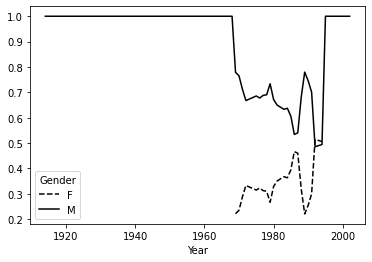

In [62]:
pivot_d_names.plot(style={'M': 'k-', 'F': 'k--'})